# 3.3 미래에 볼 영화의 평점 예측하기

## 탐색: MovieLens 데이터 살펴보기

### [MovieLens 데이터셋의 기본 정보 구하기]

In [98]:
# -*- coding: utf-8 -*-
%matplotlib inline
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
rating_file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/ml-1m/ratings.dat"
move_file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/ml-1m/movies.dat"
user_file_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/ml-1m/users.dat"


rating_data = pd.read_csv(rating_file_path,
                        names = ["user_id", "movie_id", "rating", "time"],
                        delimiter = "::",
                        encoding_errors = "ignore")
movie_data = pd.read_csv(move_file_path,
                        names = ["movie_id", "title", "genre"],
                        delimiter = "::",
                        encoding_errors = "ignore")
user_data = pd.read_csv(user_file_path,
                        names = ["user_id", "gender", "age", "occupation", "zipcode"],
                        delimiter = "::",
                        encoding_errors = "ignore")

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_3597/890102744.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_data = pd.read_csv(rating_file_path,
/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_3597/890102744.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_data = pd.read_csv(move_file_path,
/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_3597/890102744.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can av

## 분석: 탐색적 데이터 분석하기

In [100]:
# 총 영화의 개수를 출력
print("total number of movie in data:", len(movie_data["movie_id"].unique()))

# 연도별 영화 개수가 많은 Top 10 연도를 출력합니다.
movie_data["year"] = movie_data["title"].apply(lambda x: x[-5:-1])
movie_data_year = movie_data["year"].value_counts().head(10)
for a, (b, c) in enumerate(movie_data_year.iteritems()):
    print("TOP", a + 1, ":", b, c)

total number of movie in data: 3883
TOP 1 : 1996 345
TOP 2 : 1995 342
TOP 3 : 1998 337
TOP 4 : 1997 315
TOP 5 : 1999 283
TOP 6 : 1994 257
TOP 7 : 1993 165
TOP 8 : 2000 156
TOP 9 : 1986 104
TOP 10 : 1992 102


/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_3597/2270113621.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (b, c) in enumerate(movie_data_year.iteritems()):


### [장르의 속성 탐색하기]

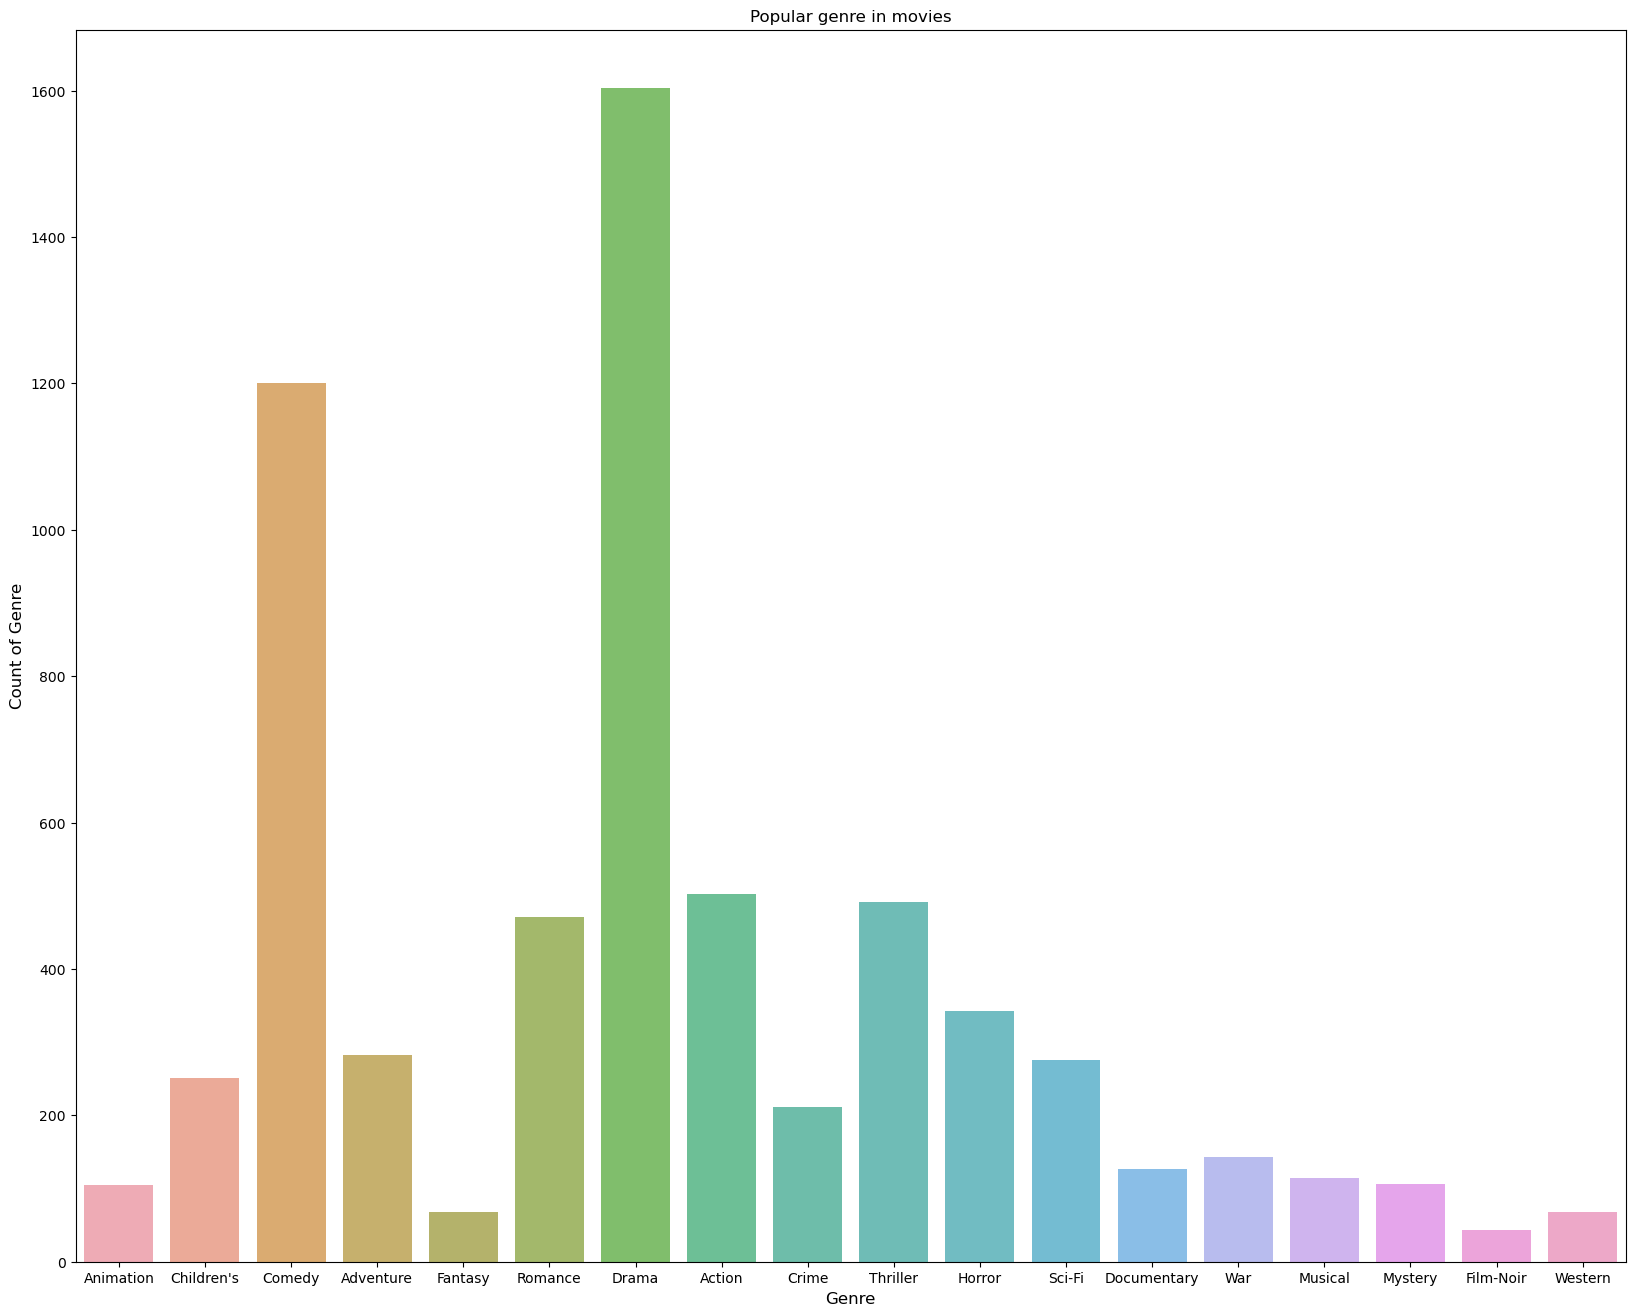

In [101]:
# 가장 많이 등장한 장르의 속성을 추출 (예시: Drama)
unique_genre_dict = {}

for index, row in movie_data.iterrows():
    # genre 피처를 "|" 구분자로 분리
    genre_combination = row["genre"]
    parsed_genre = genre_combination.split("|")

    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1

# unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력
plt.rcParams["figure.figsize"] = [20, 16]
genre = list(unique_genre_dict.keys())
counts = list(unique_genre_dict.values())

sns.barplot(x = genre, y = counts, alpha = 0.8)
plt.title("Popular genre in movies")
plt.ylabel("Count of Genre", fontsize = 12)
plt.xlabel("Genre", fontsize = 12)

plt.show()

### [분석할 유저의 정보 탐색하기]

- 미니 퀴즈

total number of user in data: 6040


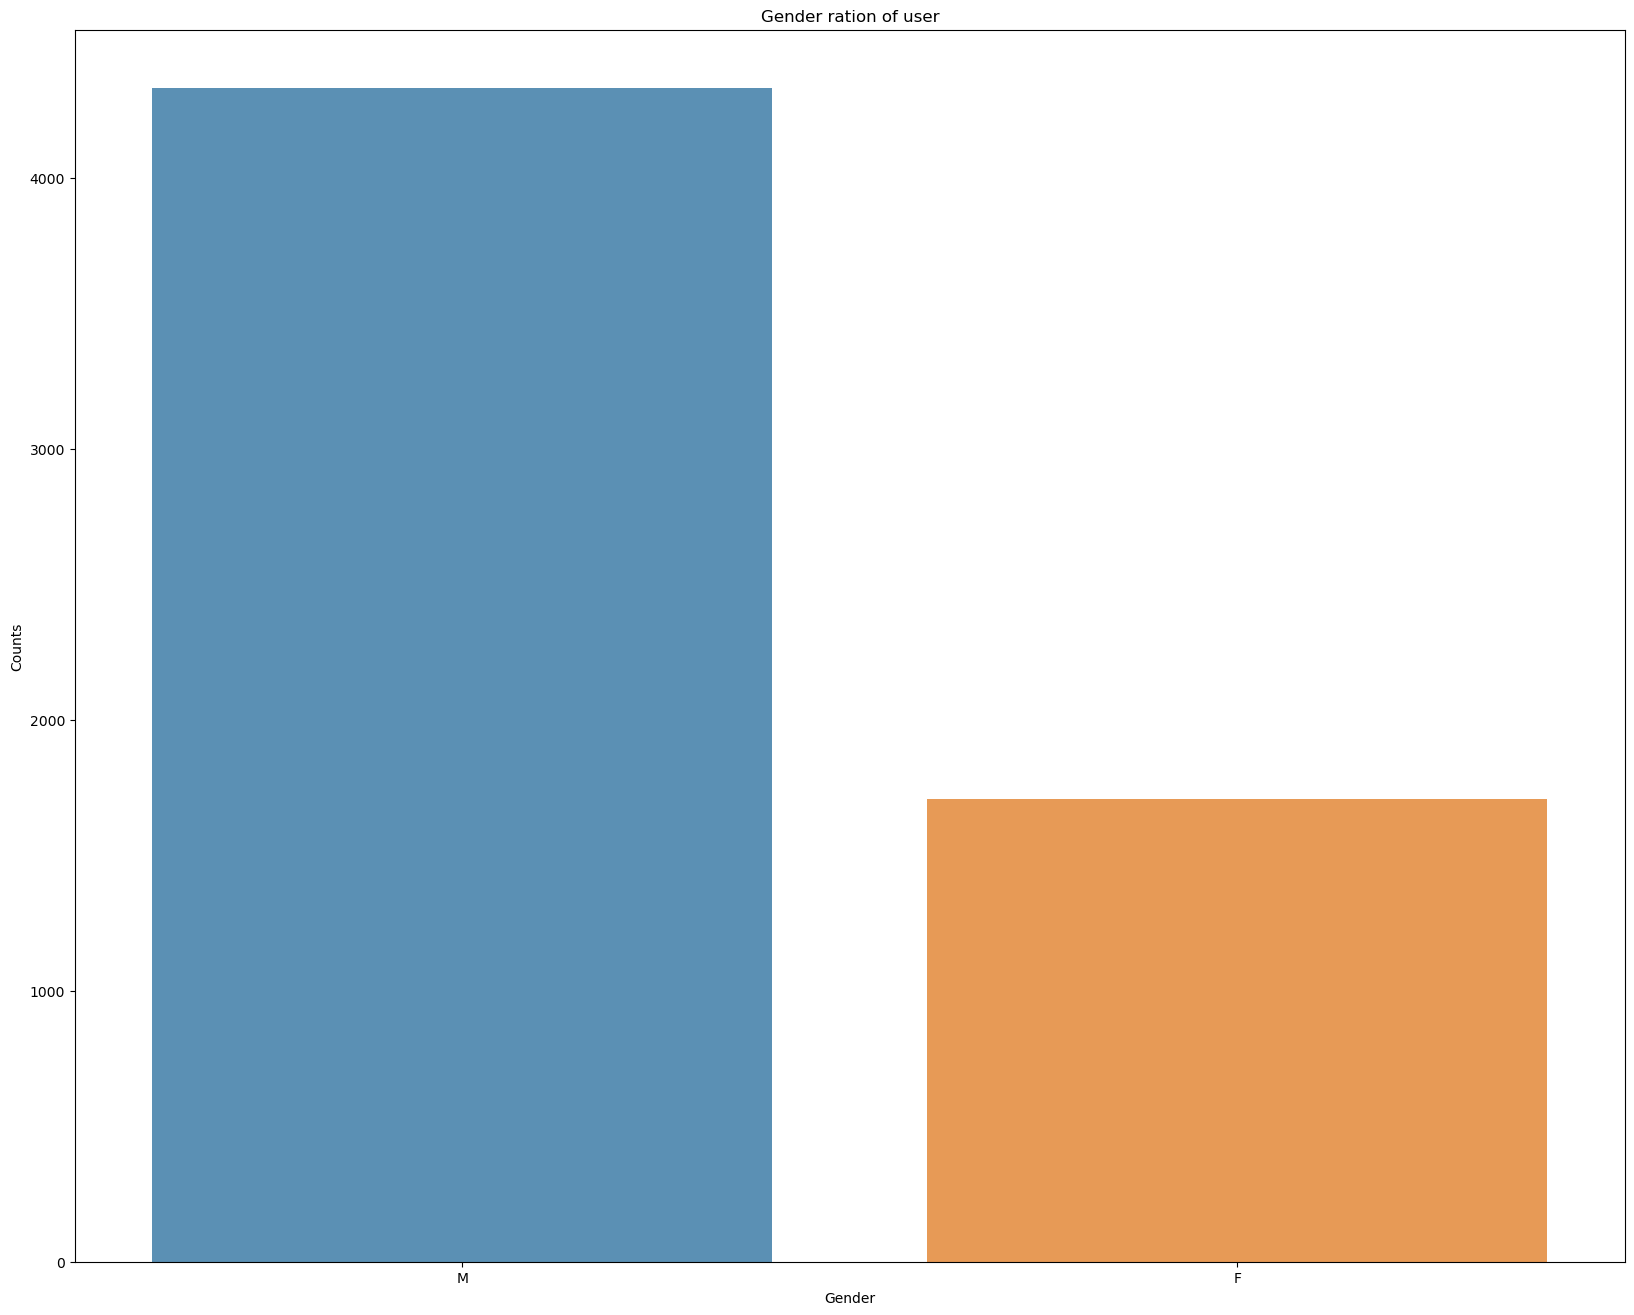

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [102]:
# 유저의 수를 탐색
print("total number of user in data:", len(user_data["user_id"].unique()))

# 유저의 성별 탐색
gender = user_data["gender"].value_counts()
sns.barplot(x = gender.index, y = gender.values, alpha = 0.8)
plt.title("Gender ration of user", fontsize = 12)
plt.ylabel("Counts")
plt.xlabel("Gender")
plt.show()

# 유저의 연령대 탐색
user_age = user_data["age"].value_counts()
user_age

### [평점 데이터의 정보 탐색하기]

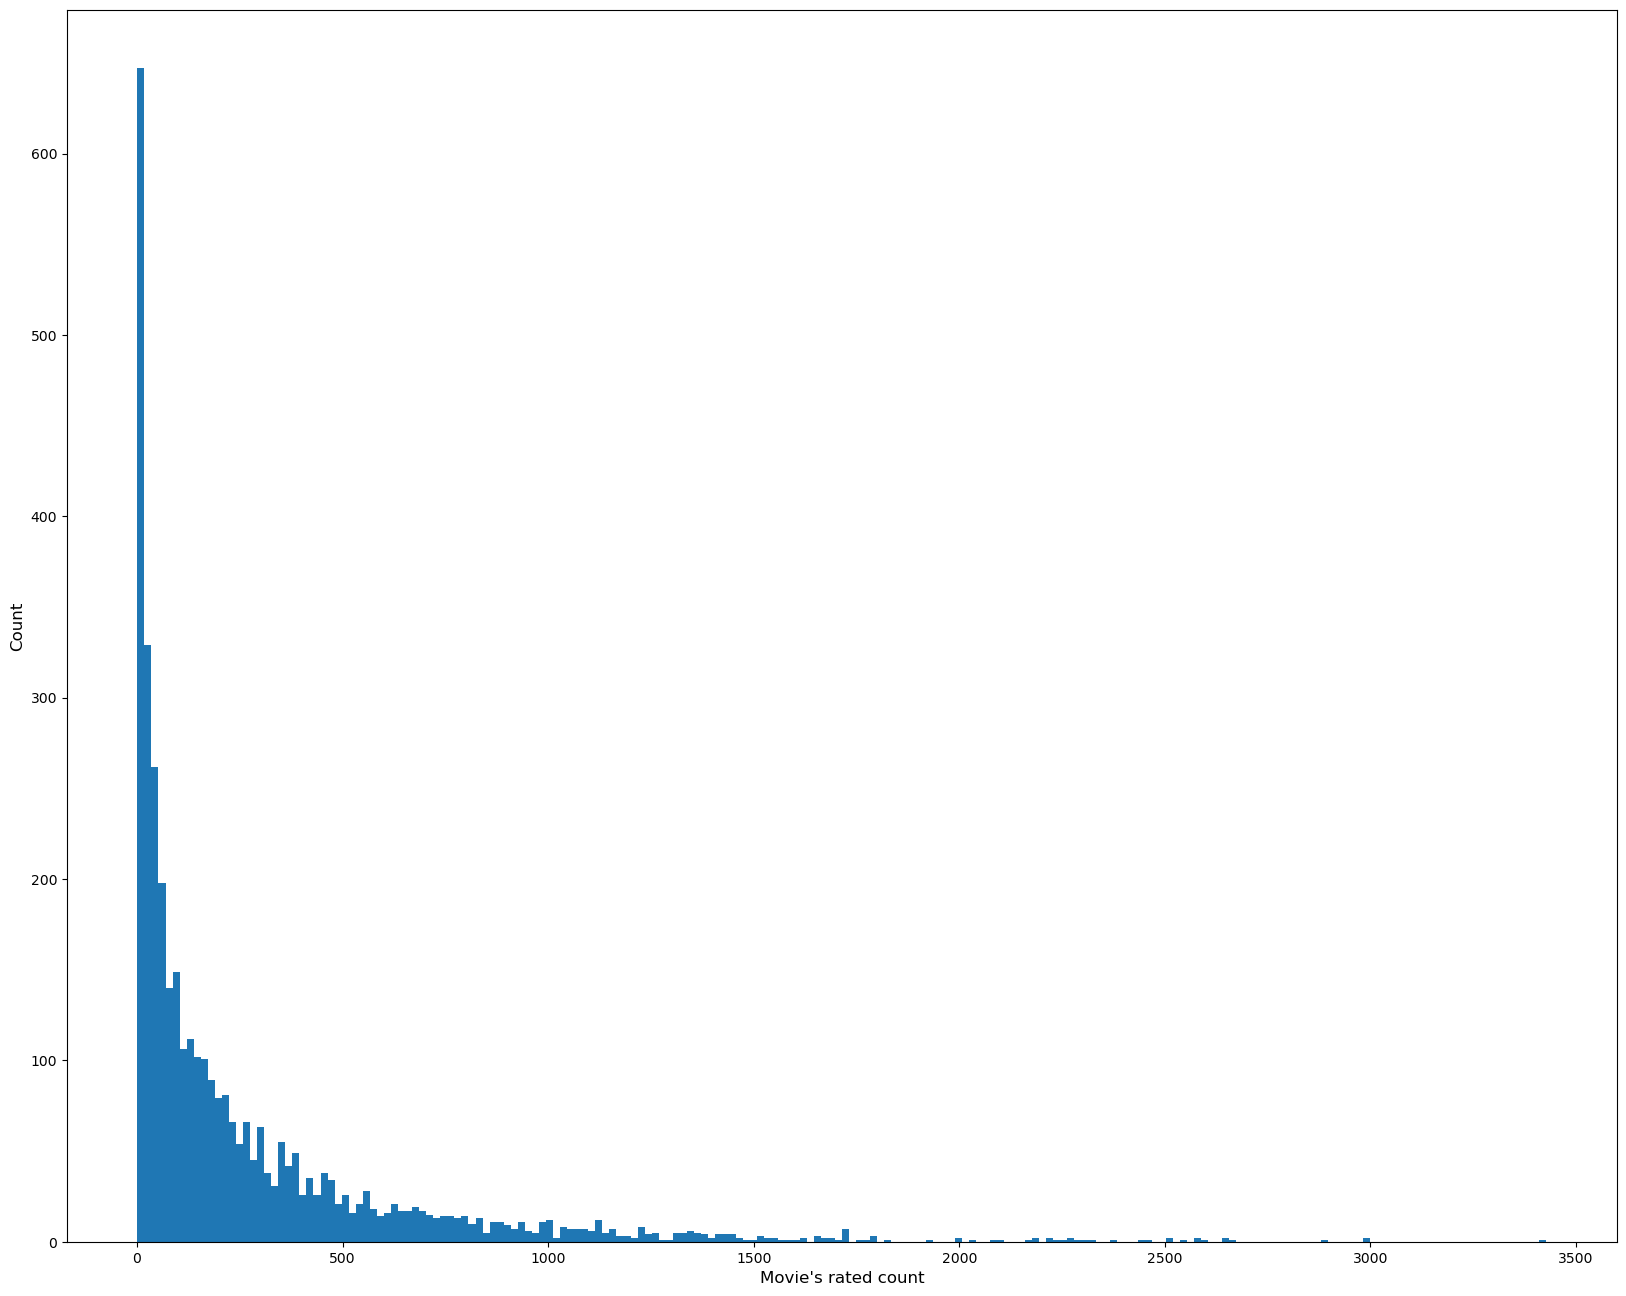

total number of movie in data : 3883
total number of movie rated below 100 : 1687


In [103]:
# 각 영화가 평가받은 횟수를 탐색
movie_rate_count = rating_data.groupby("movie_id")["rating"].count()
plt.hist(movie_rate_count, bins = 200)
plt.xlabel("Movie's rated count", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

print("total number of movie in data :", len(movie_data["movie_id"].unique()))
print("total number of movie rated below 100 :", len(movie_rate_count[movie_rate_count < 100]))

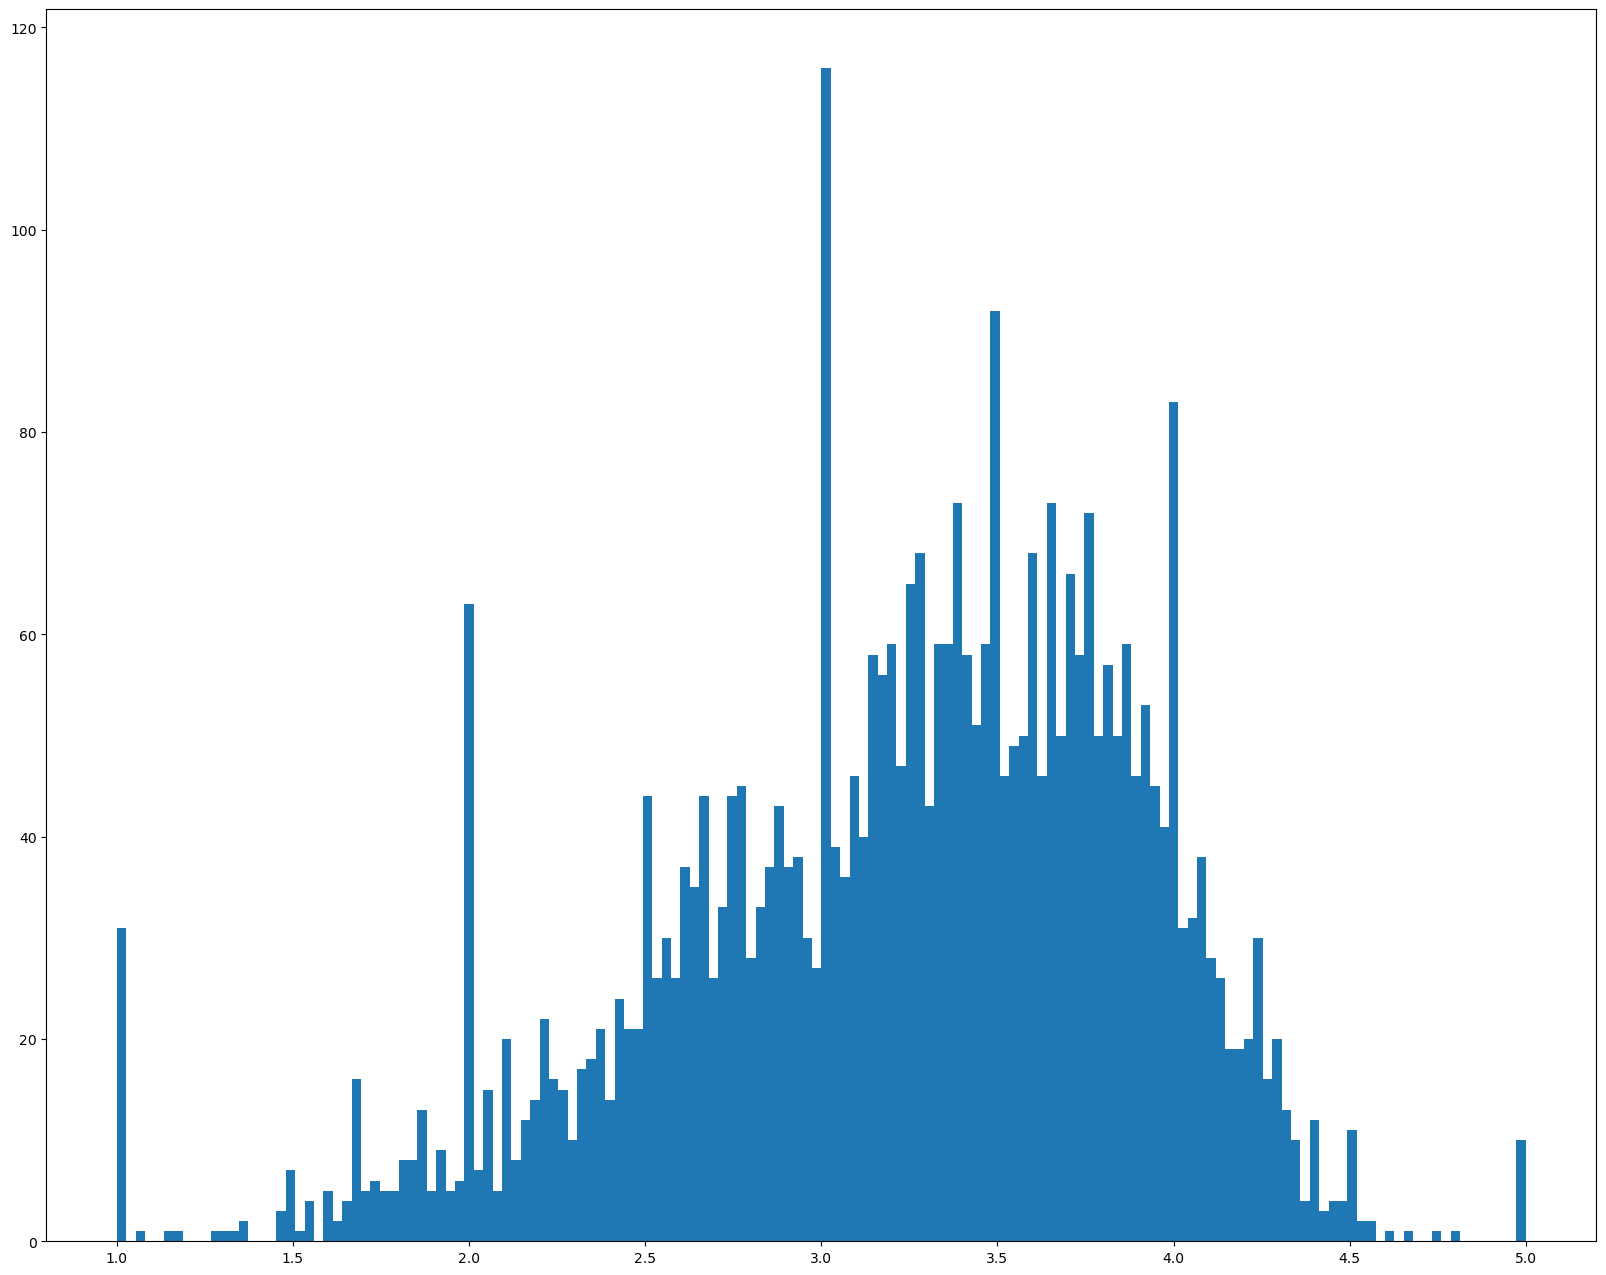

In [104]:
# 영화별 평점을 탐색
movie_grouped_rating_info = rating_data.groupby("movie_id")["rating"].agg(["count", "mean"])
movie_grouped_rating_info["mean"].hist(bins = 150, grid = False)
plt.show()

In [105]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 출력합니다.
top_rating = rating_data.groupby("movie_id")["rating"].agg(["count", "mean"]).sort_values(by = "mean", ascending = False)
top_rating = top_rating[top_rating["count"] >= 100].head(10)

for rating_id in top_rating.index.tolist():
    for id in movie_data["movie_id"]:
        if rating_id == id:
            print(movie_data["title"][movie_data[movie_data["movie_id"] == id].index])

1950    Seven Samurai (The Magnificent Seven) (Shichin...
Name: title, dtype: object
315    Shawshank Redemption, The (1994)
Name: title, dtype: object
847    Godfather, The (1972)
Name: title, dtype: object
735    Close Shave, A (1995)
Name: title, dtype: object
49    Usual Suspects, The (1995)
Name: title, dtype: object
523    Schindler's List (1993)
Name: title, dtype: object
1132    Wrong Trousers, The (1993)
Name: title, dtype: object
910    Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Name: title, dtype: object
1180    Raiders of the Lost Ark (1981)
Name: title, dtype: object
892    Rear Window (1954)
Name: title, dtype: object


- 미니 퀴즈

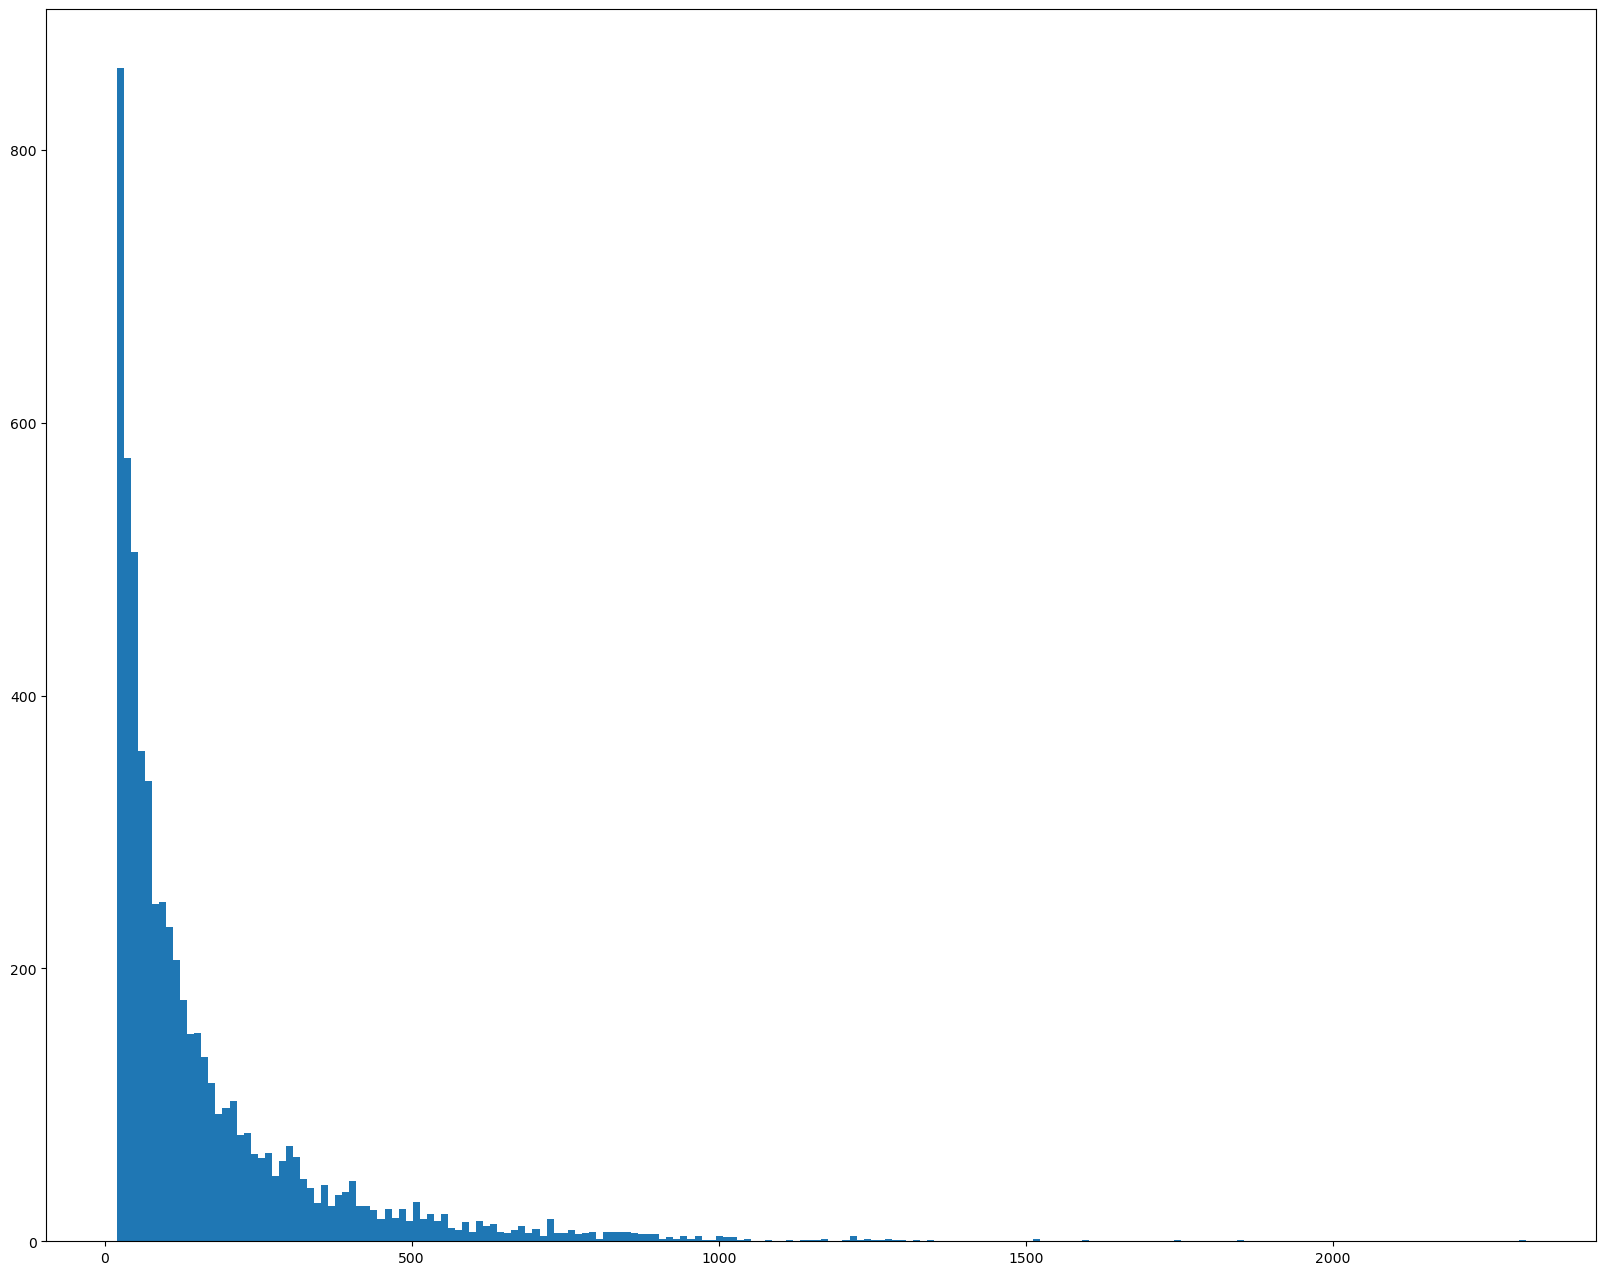

In [106]:
# 유저별로 평가한 영화 개수
user_grouped_rating_info = rating_data.groupby("user_id")["rating"].agg(["count", "mean", "std"])
plt.hist(user_grouped_rating_info["count"], bins =200)
plt.show()

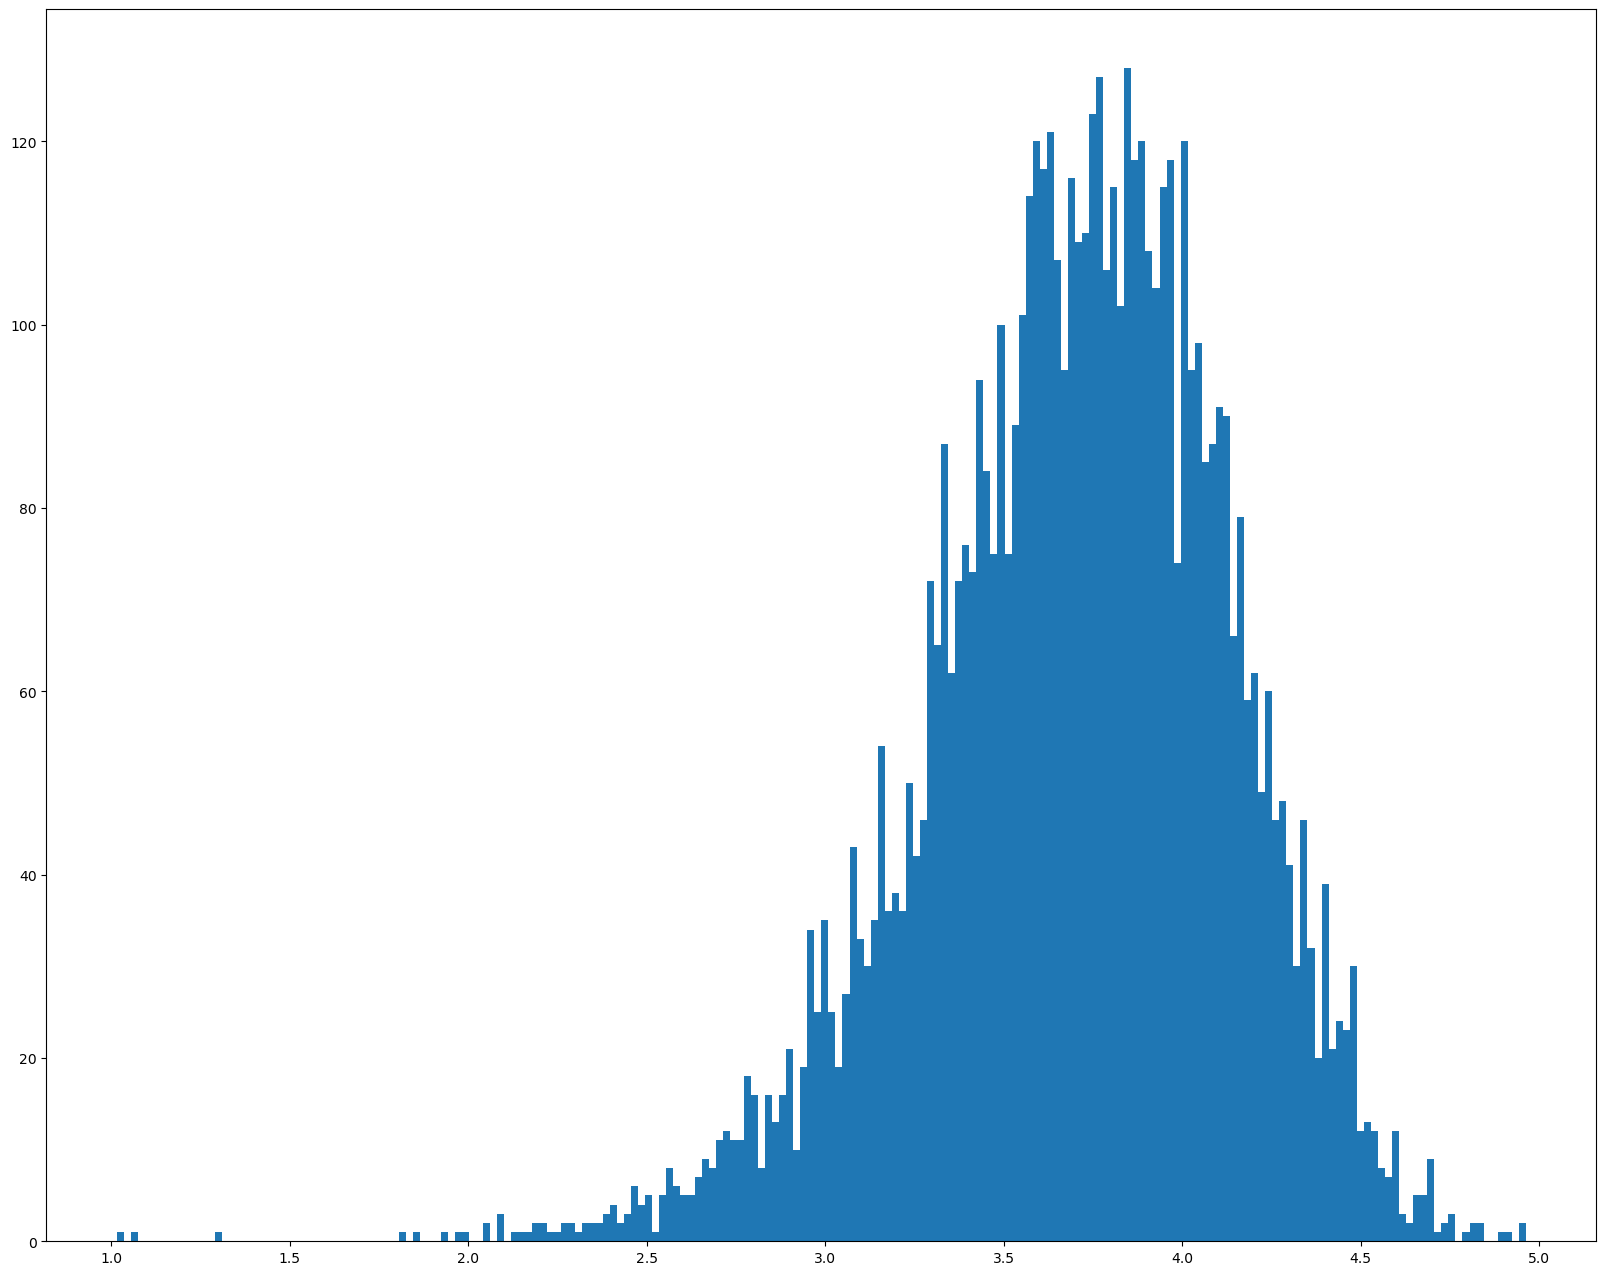

In [107]:
# 유저별로 평가한 평균 영화 점수
plt.hist(user_grouped_rating_info["mean"], bins = 200)
plt.show()

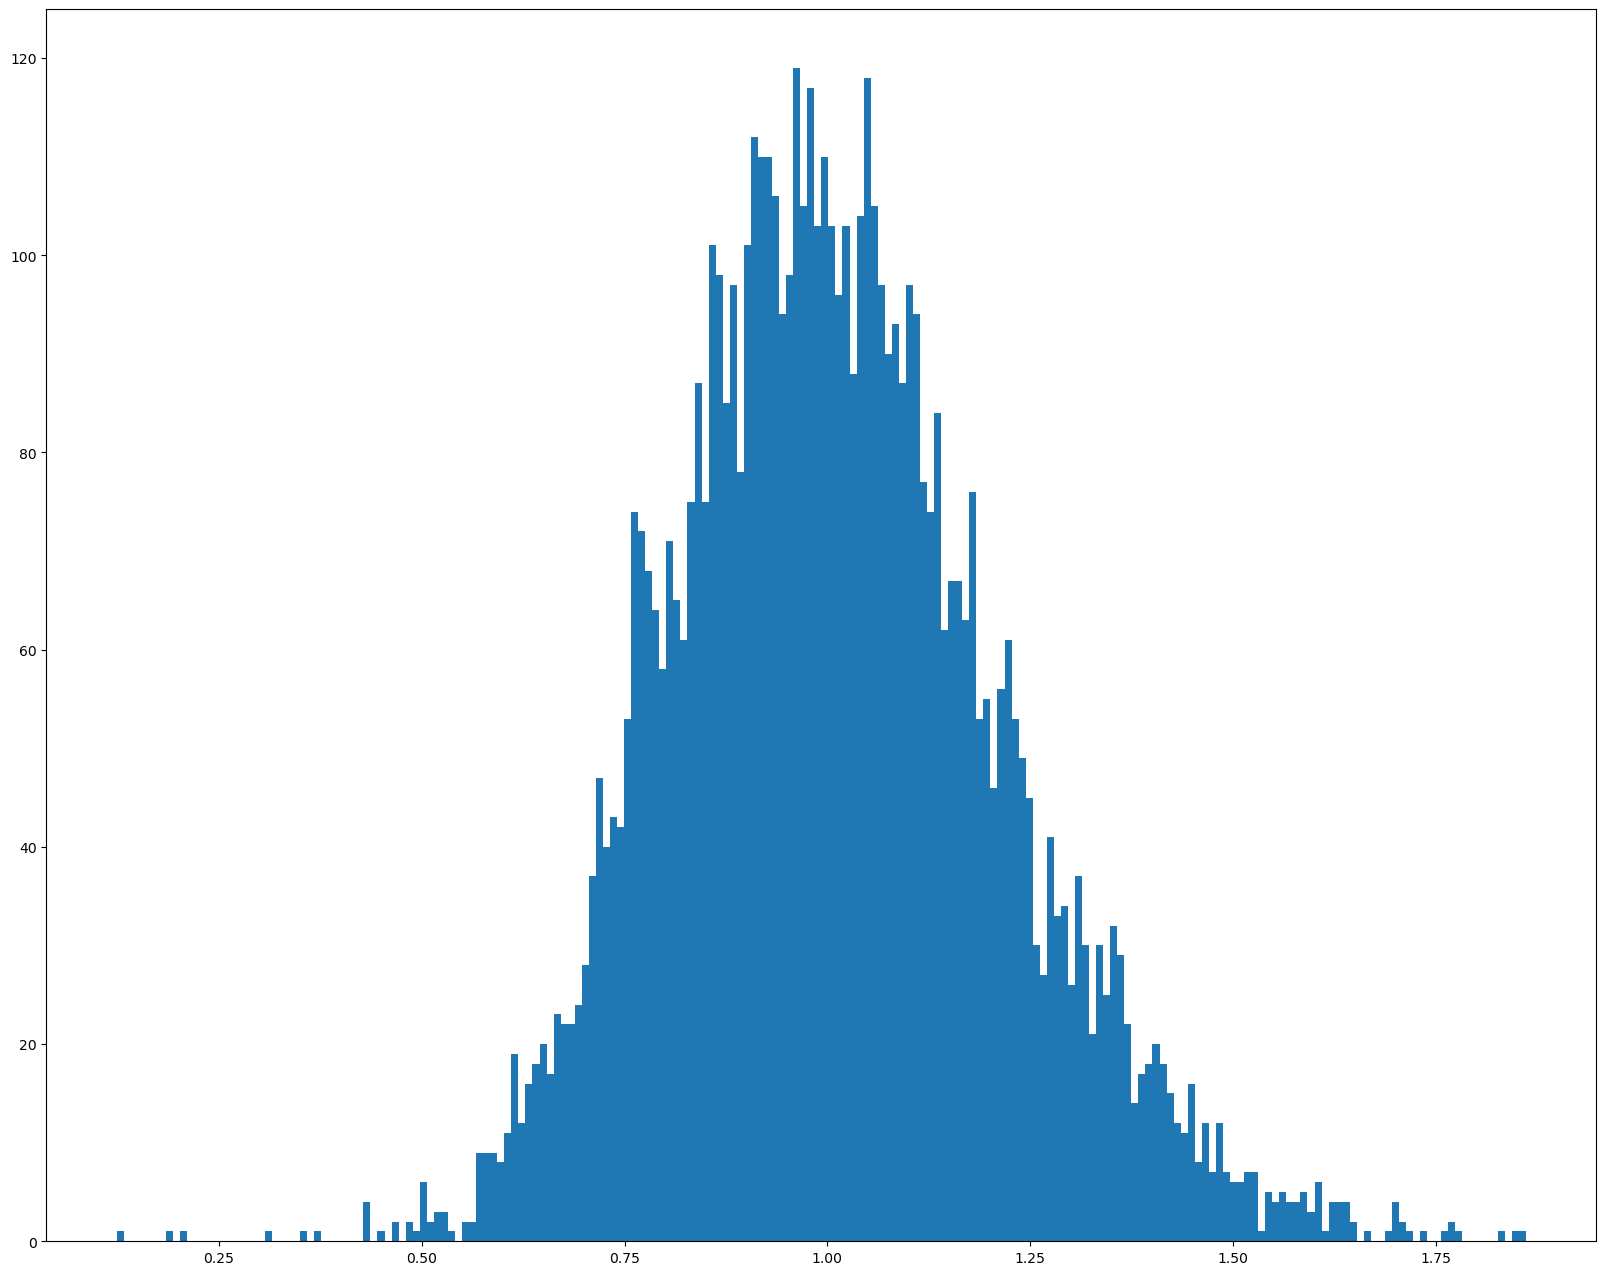

In [108]:
# 유저별로 평가한 영화 점수의 편차
plt.hist(user_grouped_rating_info["std"], bins = 200)
plt.show()

### [user-movie 형태의 표로 살펴보기]

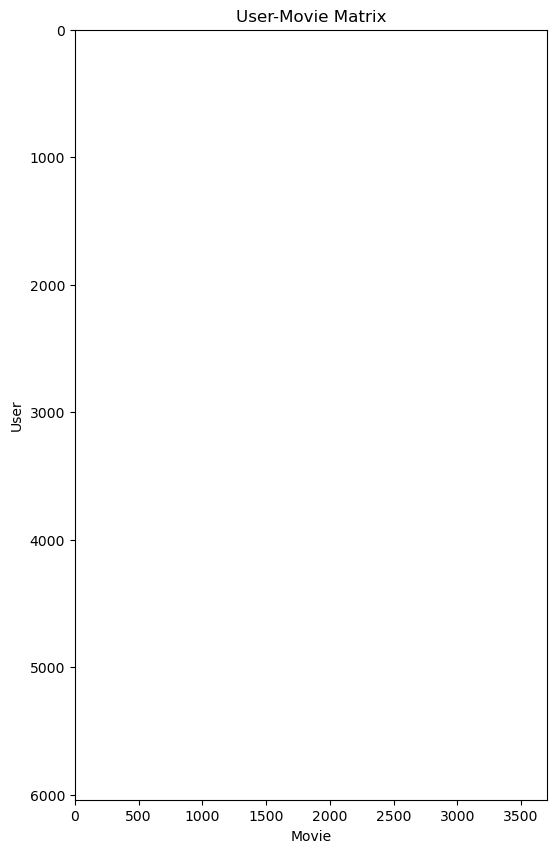

In [109]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성
rating_table = rating_data[["user_id", "movie_id", "rating"]].set_index(["user_id", "movie_id"]).unstack()

# user-movie 표를 시각화
plt.rcParams["figure.figsize"] = [10, 10]
plt.imshow(rating_table)
plt.title("User-Movie Matrix")
plt.xlabel("Movie")
plt.ylabel("User")
plt.show()

## 예측: 수학적 기법을 활용해 평점 예측하기

### 빈칸을 포함한 user-item 행렬 생성

In [110]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, GridSearchCV

np.set_printoptions(suppress=True) # => 소수 형식으로 나타나게 해줌

reader = Reader(rating_scale=(1, 5))

In [111]:
# 데이터 프레임을 생성
ratings_dict = {'item_id': [1,2,3,1,2,3,2],
                'user_id': ['a','a','a','b','b','b','c'],
                'rating': [2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)

# 데이터 프레임을 행렬로 변환
df_table = df[["item_id", "user_id", "rating"]].set_index(["user_id", "item_id"]).unstack().fillna(0)
df_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

##### SVD를 이용한 빈칸 채우기 학습

In [112]:
# SVD 사용을 위한 데이터셋을 생성합니다.
data = Dataset.load_from_df(df = df[["user_id", "item_id", "rating"]], reader = reader)
train_data = data.build_full_trainset()

In [113]:
# SVD 모델을 학습
train_start = time.time()
model = SVD(n_factors = 8,
            lr_all = 0.005,
            reg_all = 0.02,
            n_epochs = 10)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 0.18 seconds


In [114]:
# 학습한 모델을 기반으로 빈공간의 점수를 예측합니다.

"""
build_anti_testset() : 

학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""
# test_data : 학습에 사용된 유저, 혹은 아이템이지만 점수는 매겨지지 않은 데이터입니다.
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

for _, iid, _, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "predicted_rating:", predicted_rating)

Item id 1 | predicted_rating: 3.5897078698986524
Item id 3 | predicted_rating: 3.764636038742266


In [115]:
"""
build_testset() : 

학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""
test_data = train_data.build_testset()
predictions = model.test(test_data)

for _, iid, real_rating, predicted_rating, _ in predictions:
     print("Item id", iid, "|", "real_rating:", real_rating, "|", "predicted_rating:", predicted_rating)

Item id 1 | real_rating: 2.0 | predicted_rating: 3.52923626429953
Item id 2 | real_rating: 4.0 | predicted_rating: 3.7980430857383016
Item id 3 | real_rating: 4.0 | predicted_rating: 3.7118308075891564
Item id 1 | real_rating: 2.0 | predicted_rating: 3.439545406765802
Item id 2 | real_rating: 5.0 | predicted_rating: 3.845151110358842
Item id 3 | real_rating: 4.0 | predicted_rating: 3.7423914872373483
Item id 2 | real_rating: 5.0 | predicted_rating: 3.9321545179234394


### [MovieLens 데이터에 SVD 적용하기]

In [116]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성
rating_table = rating_data[["user_id", "movie_id", "rating"]].set_index(["user_id", "movie_id"]).unstack()

# 학습 데이터를 생성
data = Dataset.load_from_df(rating_data[["user_id", "movie_id", "rating"]], reader = reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습
train_start = time.time()
model = SVD(n_factors = 8,
            lr_all = 0.005, # 학습률
            reg_all = 0.02, # 정규화 항
            n_epochs = 100) # 연산 횟수
model.fit(train_data)
train_end = time.time()
print("training time of model %.2f seconds" % (train_end - train_start))

training time of model 8.97 seconds


### [영화의 점수를 예측할 타겟 유저 선정]

In [117]:
# user_id가 4인 유저의 영화 평가 데이터
target_user_id = 4
traget_user_data = rating_data[rating_data["user_id"] == target_user_id]
traget_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [118]:
# user_id가 4인 유저가 평가한 영화 히스토리 정보를 추출
target_user_movie_rating_dict = {}

for index, row in traget_user_data.iterrows():
    movie_id = row["movie_id"]
    target_user_movie_rating_dict[movie_id] = row["rating"]
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

### [타겟 유저가 보지 않은 영화 중, 예상 평점이 높은 10개 선정]

In [119]:
# 타겟 유저가 보지 않은 영화 정보를 테스트 데이터로 생성
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row["movie_id"]
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

# 타겟 유저의 평점 점수를 예측
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            user_id = target_user_id,
                                                            user_history = target_user_movie_rating_dict)

# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), key = operator.itemgetter(1), reverse = True)[:10]
target_user_top10_predicted

[(213, 5),
 (214, 5),
 (527, 5),
 (615, 5),
 (669, 5),
 (670, 5),
 (750, 5),
 (800, 5),
 (858, 5),
 (898, 5)]

In [120]:
# 타이틀 정보로 출력하기 위해 movie_id마다 movie_title을 딕셔너리로 저장
movie_dict = {}
for indx, row in movie_data.iterrows():
    movie_id = row["movie_id"]
    movie_title = row["title"]
    movie_dict[movie_id] = movie_title

# 앞서 계산한 Top 10 영화에 movie_title을 매핑하여 출력
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    rating = predicted[1]
    print(movie_dict[movie_id], ":", rating)

Burnt By the Sun (Utomlyonnye solntsem) (1994) : 5
Before the Rain (Pred dozhdot) (1994) : 5
Schindler's List (1993) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Aparajito (1956) : 5
World of Apu, The (Apur Sansar) (1959) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5
Lone Star (1996) : 5
Godfather, The (1972) : 5
Philadelphia Story, The (1940) : 5


In [121]:
# 타겟 유저의 기존 선호 영화와 비교
target_user_top10_real = sorted(target_user_movie_rating_dict.items(), key = operator.itemgetter(1), reverse = True)[:10]
target_user_top10_real
for real in target_user_top10_real:
    movie_id = real[0]
    real_rating = real[1]
    print(movie_dict[movie_id], ":", real_rating)

Hustler, The (1961) : 5
Star Wars: Episode IV - A New Hope (1977) : 5
Saving Private Ryan (1998) : 5
Raiders of the Lost Ark (1981) : 5
Rocky (1976) : 5
Jaws (1975) : 5
Good, The Bad and The Ugly, The (1966) : 5
Run Lola Run (Lola rennt) (1998) : 5
Goldfinger (1964) : 5
Terminator, The (1984) : 5


## 평가: 예측 모델 평가하기

### [예측 모델의 평가 방법]

In [122]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성 및 학습 데이터와 테스트 데이터를 8:2로 분할
reader = Reader(rating_scale = (1, 5))
data = Dataset.load_from_df(rating_data[["user_id", "movie_id", "rating"]], reader = reader)
train_data, test_data = train_test_split(data, test_size = 0.2)

# SVD 모델을 학습
train_start = time.time()
model = SVD(n_factors = 8,
            lr_all = 0.005,
            reg_all = 0.02,
            n_epochs = 100)
model.fit(train_data)
train_end = time.time()

print("training time of model %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터와 RMSE를 출력
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model 14.78 seconds
RMSE of test dataset in SVD model:
RMSE: 0.8604


0.8603870213916137

- 미니 퀴즈

In [123]:
# RMSE를 이용해 적당한 하이퍼 파라미터 n_factors를 찾아보기
rmse_list_by_factors = []
ttime_list_by_factors = []

for i in range(1, 15):
    train_start = time.time()
    model = SVD(n_factors = i,
                lr_all = 0.005,
                reg_all = 0.02,
                n_epochs = 100)
    model.fit(train_data)
    train_end = time.time()
    print("training time of model: %.2f seconds" % (train_end - train_start))
    print("RMSE of test dataset in SVD model, n_facotrs=" + str(i))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print("------------------------------------")
print("searching n_factors is finish")

training time of model: 12.79 seconds
RMSE of test dataset in SVD model, n_facotrs=1
RMSE: 0.8830
------------------------------------
training time of model: 13.05 seconds
RMSE of test dataset in SVD model, n_facotrs=2
RMSE: 0.8753
------------------------------------
training time of model: 13.22 seconds
RMSE of test dataset in SVD model, n_facotrs=3
RMSE: 0.8677
------------------------------------
training time of model: 13.16 seconds
RMSE of test dataset in SVD model, n_facotrs=4
RMSE: 0.8628
------------------------------------
training time of model: 13.31 seconds
RMSE of test dataset in SVD model, n_facotrs=5
RMSE: 0.8629
------------------------------------
training time of model: 13.44 seconds
RMSE of test dataset in SVD model, n_facotrs=6
RMSE: 0.8585
------------------------------------
training time of model: 13.57 seconds
RMSE of test dataset in SVD model, n_facotrs=7
RMSE: 0.8604
------------------------------------
training time of model: 13.56 seconds
RMSE of test data

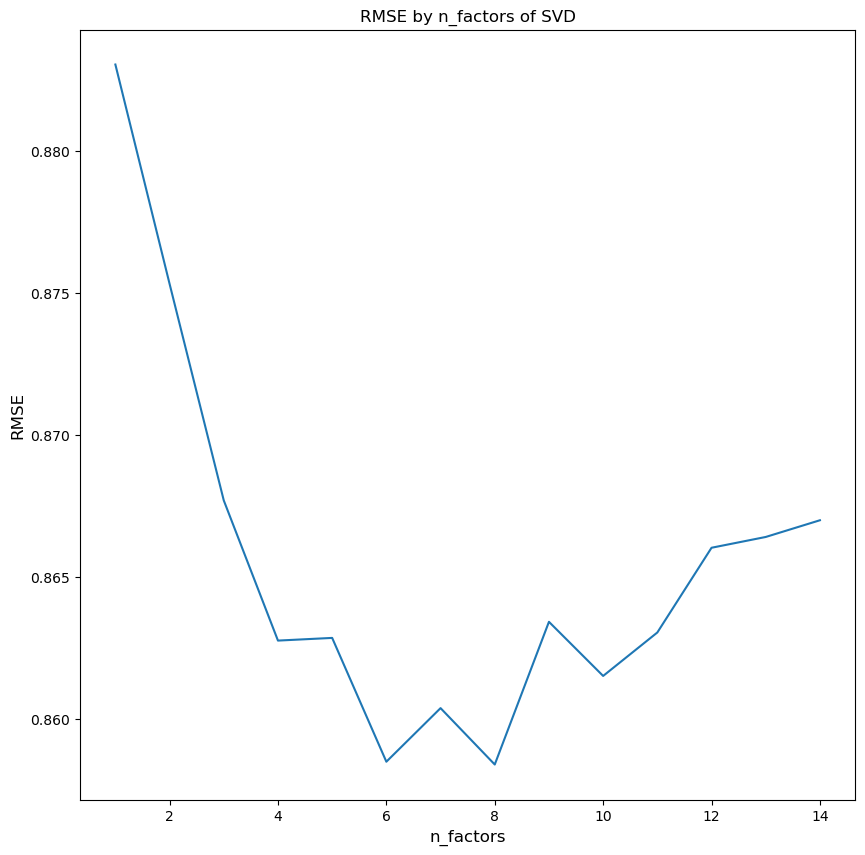

In [124]:
# 하이퍼 파라미터 n_factors 설정 변화에 따른 RMSE 그래프를 출력
x_pos = np.arange(1, 15)
plt.plot(x_pos, rmse_list_by_factors)
plt.title("RMSE by n_factors of SVD")
plt.ylabel("RMSE", fontsize = 12)
plt.xlabel("n_factors", fontsize = 12)
plt.show()

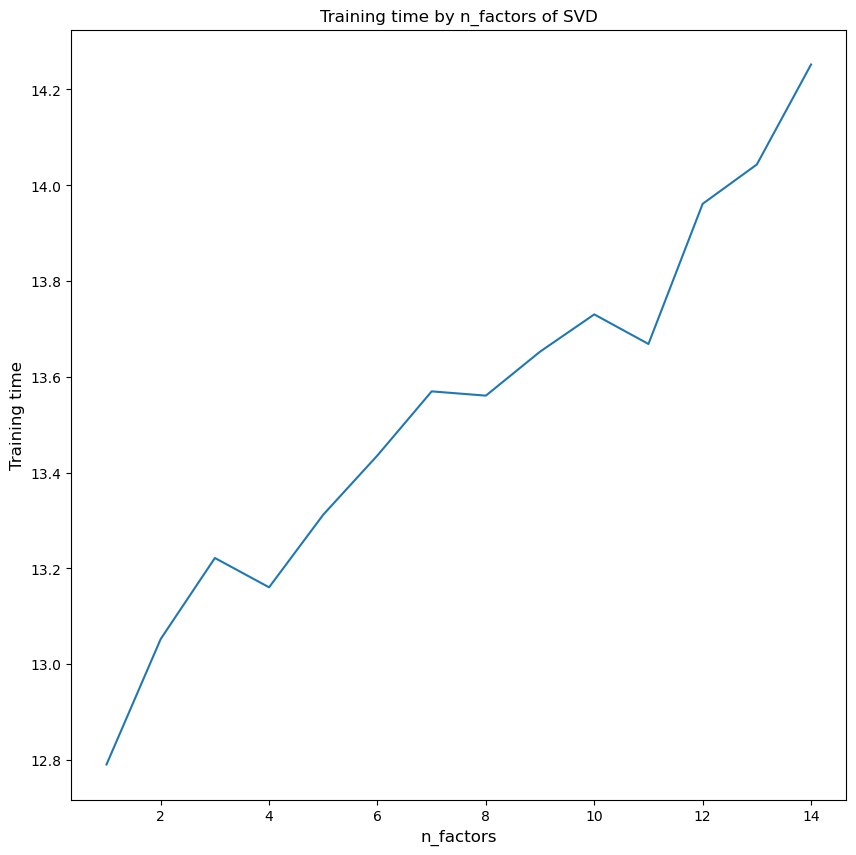

In [125]:
x_pos = np.arange(1, 15)
plt.plot(x_pos, ttime_list_by_factors)
plt.title("Training time by n_factors of SVD")
plt.ylabel("Training time", fontsize = 12)
plt.xlabel("n_factors", fontsize = 12)
plt.show()

### [실제 평점과의 비교 시각화하기: 평점 예측 단계]

In [126]:
# 타겟 유저 정보를 테스트 데이터로 생성
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row["movie_id"]
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

# 타겟 유저의 평점 점수를 예측
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            user_id = target_user_id,
                                                            user_history = target_user_movie_rating_dict)
target_user_movie_predict_dict

{260: 4.109660170683008,
 480: 3.56100455635225,
 1036: 3.964519894201435,
 1097: 4.314384344491176,
 1196: 3.862571100308431,
 1198: 4.188345065054762,
 1201: 3.937112160822475,
 1210: 3.4468874404326373,
 1214: 4.050891538751723,
 1240: 3.974709099419904,
 1387: 4.517111957567719,
 1954: 4.134031690784641,
 2028: 4.574429977838901,
 2366: 3.701809282664185,
 2692: 4.175123763407719,
 2947: 3.5814821690632064,
 2951: 3.891273001472824,
 3418: 4.343630418153142,
 3468: 4.657409244594807,
 3527: 2.9099603856710776,
 3702: 3.293752700062266}

### [실제 평점과의 비교 시각화하기]

In [127]:
# 예측 점수와 실제 점수를 영화 타이틀에 매핑
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0

for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating, 2)
    origin_rating = target_user_movie_rating_dict[movie_id]
    movie_title = movie_dict[movie_id]
    print("movie", str(idx), ":", movie_dict[movie_id], "-", origin_rating, "/", "predicted_rating")
    predicted_rating_list.append(predicted_rating)
    origin_rating_list.append(origin_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / predicted_rating
movie 2 : Jurassic Park (1993) - 4 / predicted_rating
movie 3 : Die Hard (1988) - 4 / predicted_rating
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / predicted_rating
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / predicted_rating
movie 6 : Raiders of the Lost Ark (1981) - 5 / predicted_rating
movie 7 : Good, The Bad and The Ugly, The (1966) - 5 / predicted_rating
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / predicted_rating
movie 9 : Alien (1979) - 4 / predicted_rating
movie 10 : Terminator, The (1984) - 5 / predicted_rating
movie 11 : Jaws (1975) - 5 / predicted_rating
movie 12 : Rocky (1976) - 5 / predicted_rating
movie 13 : Saving Private Ryan (1998) - 5 / predicted_rating
movie 14 : King Kong (1933) - 4 / predicted_rating
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / predicted_rating
movie 16 : Goldfinger (1964) - 5 / predicted_rating
movie 17 : Fistful of 

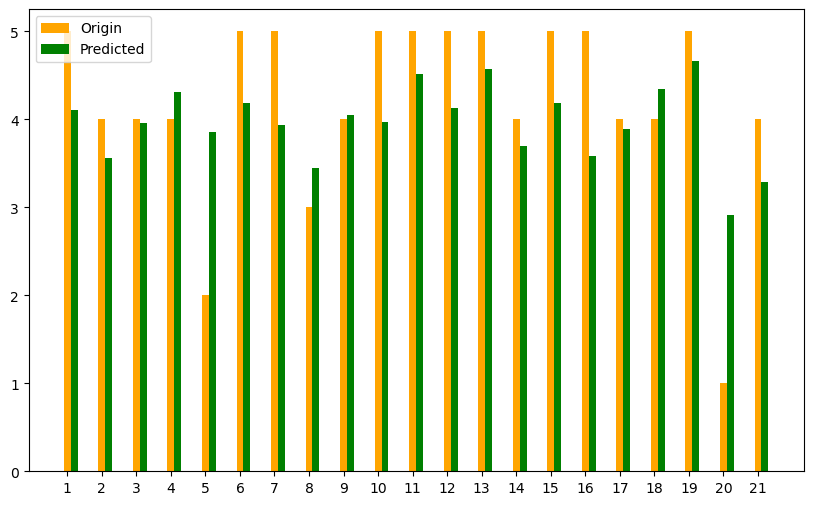

In [128]:
# 실제 점수와 예측 점수를 리스트로 추출
origin = origin_rating_list
predicted = predicted_rating_list

# 영화의 개수만큼 막대 그래프의 index 개수를 생성
plt.rcParams["figure.figsize"] = [10, 6]
index = np.arange(len(movie_title_list))
bar_width = 0.2

# 실제 점수와 예측 점수를 bar 그래프로 출력
rects1 = plt.bar(index, origin, bar_width,
                color = "orange",
                label = "Origin")
rects2 = plt.bar(index + bar_width, predicted, bar_width,
                color = "green",
                label = "Predicted")
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()